In [ ]:
# ![download.png](attachment:download.png)
# ECS4300/ECS3300-Artificial Intelligence and Computer Vision
## Lab Tutorial 04

### Weighted Median Filter
A Weighted Median Filter is a variant of the median filter that assigns weights to the values within the filter window, allowing certain pixels to influence the median more than others. This approach is useful for preserving important features like edges in image processing applications while still effectively reducing noise.

(-0.5, 199.5, 199.5, -0.5)

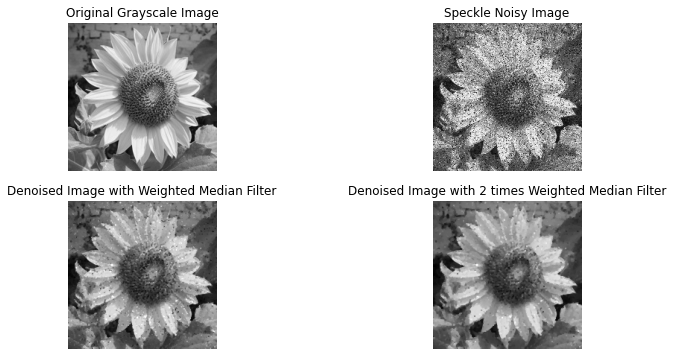

In [16]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def add_speckle_noise(image, amount, variance=0.5):
    """
    Add speckle noise to random pixels in a grayscale image as defined by noise_image = I * (1 + random_noise).

    :param image: A PIL Image object.
    :param amount: Proportion of image pixels to alter (between 0 and 1).
    :param variance: Variance of the speckle noise.
    :return: Grayscale image with speckle noise.
    """
    # Convert image to numpy array
    img_array = np.array(image, dtype=float)

    # Calculate number of pixels to alter
    num_pixels = int(amount * img_array.shape[0] * img_array.shape[1])

    # Generate speckle noise for selected pixels
    noise = np.random.normal(0, variance, num_pixels)

    # Randomly pick pixel indices
    indices = np.random.choice(img_array.shape[0] * img_array.shape[1], num_pixels, replace=False)

    # Apply noise to the selected pixels
    for idx in indices:
        x, y = divmod(idx, img_array.shape[1])
        img_array[x, y] *= (1 + noise[idx % num_pixels])

    img_array = np.clip(img_array, 0, 255)

    return Image.fromarray(img_array.astype(np.uint8))

def weighted_median_filter(image, kernel_size, weights):
    """
    Apply a weighted median filter to a grayscale image.

    :param image: Input 2D image as a NumPy array
    :param kernel_size: Tuple indicating the size of the kernel (e.g., (3, 3))
    :param weights: 2D array of weights with the same dimensions as kernel_size
    :return: Weighted median filtered image as a NumPy array
    """
    d = kernel_size[0] // 2
    # Pad the image with the border reflection mode
    padded_image = np.pad(image, d, mode='reflect')
    output_image = np.zeros_like(image)
    
    for i in range(d, padded_image.shape[0] - d):
        for j in range(d, padded_image.shape[1] - d):
            # Extract the region of interest
            roi = padded_image[i - d:i + d + 1, j - d:j + d + 1]
            weighted_list = []

            # Apply weights to the pixels in the region of interest
            for (row, col), weight in np.ndenumerate(weights):
                weighted_list.extend([roi[row, col]] * weight)

            # Compute the median value and assign it to the central pixel
            median_value = np.median(weighted_list)
            output_image[i - d, j - d] = median_value
                
    return output_image.astype(np.uint8)

# Example usage:
# Load a grayscale image using PIL
image_path = "D:/SLTC/Teaching/School of Computing/Artificial Intelligence and Computer Vission/sample_images/3.jpg"
original_image = Image.open(image_path).convert('L')

# Add speckle noise to random pixels in the image
noisy_image = add_speckle_noise(original_image, amount=0.5)

# Convert PIL Image to NumPy array for processing
noisy_image_array = np.array(noisy_image)

# Define the kernel size and the corresponding weights
kernel_size = (3, 3)
weights = np.array([[1, 2, 1], 
                    [2, 4, 2], 
                    [1, 2, 1]])

# Apply the weighted median filter to the grayscale image
filtered_image_array1 = weighted_median_filter(noisy_image_array, kernel_size, weights)

# Convert the filtered NumPy array back to a PIL Image for visualization
filtered_image1 = Image.fromarray(filtered_image_array1)

# 
# Apply the weighted median filter 2nd time to the filtered image
filtered_image_array2 = weighted_median_filter(filtered_image_array1, kernel_size, weights)

# Convert the filtered NumPy array back to a PIL Image for visualization
filtered_image2 = Image.fromarray(filtered_image_array2)

plt.figure(figsize=(12, 6))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Noisy image
plt.subplot(2, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Speckle Noisy Image')
plt.axis('off')

# Denoised image
plt.subplot(2, 2, 3)
plt.imshow(filtered_image1, cmap='gray')
plt.title('Denoised Image with Weighted Median Filter')
plt.axis('off')

# Denoised image
plt.subplot(2, 2, 4)
plt.imshow(filtered_image2, cmap='gray')
plt.title('Denoised Image with 2 times Weighted Median Filter')
plt.axis('off')

### Weighted Median Filter (Color Images)

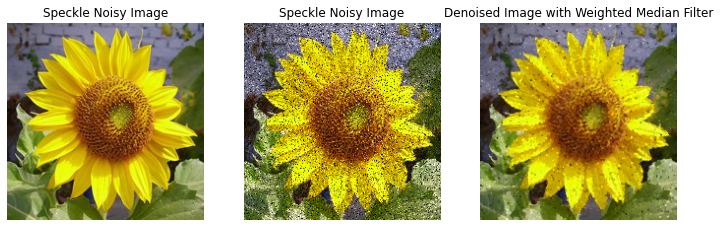

In [17]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def add_speckle_noise(image, amount, variance=0.5):
    """
    Add speckle noise to random pixels in an image as defined by noise_image = I * (1 + random_noise).

    :param image: A PIL Image object.
    :param amount: Proportion of image pixels to alter (between 0 and 1).
    :param variance: Variance of the speckle noise.
    :return: Image with speckle noise.
    """
    # Convert image to numpy array
    img_array = np.array(image, dtype=float)

    # Calculate number of pixels to alter
    num_pixels = int(amount * img_array.shape[0] * img_array.shape[1])

    # Generate speckle noise for selected pixels
    noise = np.random.normal(0, variance, num_pixels)

    # Randomly pick pixel indices
    indices = np.random.choice(img_array.shape[0] * img_array.shape[1], num_pixels, replace=False)

    # Apply noise to the selected pixels
    for idx in indices:
        x, y = divmod(idx, img_array.shape[1])
        img_array[x, y] *= (1 + noise[idx % num_pixels])

    img_array = np.clip(img_array, 0, 255)

    return Image.fromarray(img_array.astype(np.uint8))


def weighted_median_filter_color(image, kernel_size, weights):
    """
    Apply a weighted median filter to a color image.

    :param image: Input 3D image as a NumPy array (height x width x channels)
    :param kernel_size: Tuple indicating the size of the kernel (e.g., (3, 3))
    :param weights: 2D array of weights with the same dimensions as kernel_size
    :return: Weighted median filtered image as a NumPy array
    """
    if len(image.shape) != 3 or image.shape[2] != 3:
        raise ValueError("Input image must be a color image with 3 channels.")
    
    d = kernel_size[0] // 2
    # Pad the image with the border reflection mode, separately for each channel
    padded_image = np.pad(image, [(d, d), (d, d), (0, 0)], mode='reflect')
    output_image = np.zeros_like(image)
    
    for i in range(d, padded_image.shape[0] - d):
        for j in range(d, padded_image.shape[1] - d):
            # Iterate through each channel
            for k in range(3):  # Assuming 3 channels for a color image
                # Extract the region of interest for the current channel
                roi = padded_image[i - d:i + d + 1, j - d:j + d + 1, k]
                weighted_list = []

                # Apply weights to the pixels in the region of interest
                for (row, col), weight in np.ndenumerate(weights):
                    weighted_list.extend([roi[row, col]] * weight)

                # Compute the median value and assign it to the central pixel
                median_value = np.median(weighted_list)
                output_image[i - d, j - d, k] = median_value
                
    return output_image.astype(np.uint8)

# Example usage:
# Load a color image using PIL
image_path = "D:/SLTC/Teaching/School of Computing/Artificial Intelligence and Computer Vission/sample_images/3.jpg"
original_image = Image.open(image_path).convert('RGB')

# Add speckle noise to random pixels in the image
noisy_image = add_speckle_noise(original_image, amount=0.5)

# Convert PIL Image to NumPy array for processing
noisy_image_array = np.array(noisy_image)

# Define the kernel size and the corresponding weights
kernel_size = (3, 3)
weights = np.array([[1, 2, 1], 
                    [2, 4, 2], 
                    [1, 2, 1]])

# Apply the weighted median filter to the color image
filtered_image_array = weighted_median_filter_color(noisy_image_array, kernel_size, weights)

# Convert the filtered NumPy array back to a PIL Image for visualization
filtered_image = Image.fromarray(filtered_image_array)

plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title('Speckle Noisy Image')
plt.axis('off')

# Noisy image
plt.subplot(1, 3, 2)
plt.imshow(noisy_image)
plt.title('Speckle Noisy Image')
plt.axis('off')

# Denoised image
plt.subplot(1, 3, 3)
plt.imshow(filtered_image)
plt.title('Denoised Image with Weighted Median Filter')
plt.axis('off')

plt.show()

### Egde Detection Filter (Derivative Filters)
Edge Detection Filters, often called Derivative Filters, are fundamental tools in image processing used to identify points where the brightness of an image changes sharply or, more formally, has discontinuities. These points typically correspond to edges and outlines of objects within an image. By calculating the gradient of the image intensity at each pixel, edge detection filters highlight the boundaries between objects and the background, enhancing the structural information and detail in an image.

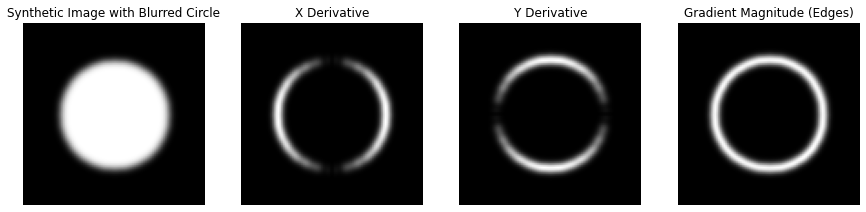

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Function to create a synthetic image with a blurred circle
def create_synthetic_image_with_circle(size=(100, 100), radius=30, center=None, blur_amount=2):
    if center is None:
        center = (size[0] // 2, size[1] // 2)
    Y, X = np.ogrid[:size[0], :size[1]]
    distance_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
    circle = distance_from_center <= radius
    blurred_circle = gaussian_filter(circle.astype(float), sigma=blur_amount)
    return blurred_circle

# Compute the first derivative (gradient) of the image
def compute_derivative(image):
    derivative_x = np.diff(image, axis=1)  # Finite difference in x direction
    derivative_y = np.diff(image, axis=0)  # Finite difference in y direction

    # Pad the derivative array to match the original image size
    derivative_x = np.pad(derivative_x, ((0, 0), (0, 1)), mode='edge')
    derivative_y = np.pad(derivative_y, ((0, 1), (0, 0)), mode='edge')

    # Combine the derivatives to get the gradient magnitude
    gradient_magnitude = np.sqrt(derivative_x**2 + derivative_y**2)
    return gradient_magnitude, derivative_x, derivative_y

# Main demonstration
def main():
    synthetic_image = create_synthetic_image_with_circle()
    gradient_magnitude,derivative_x,derivative_y = compute_derivative(synthetic_image)

    plt.figure(figsize=(15, 5))

    # Display the original image
    plt.subplot(1, 4, 1)
    plt.imshow(synthetic_image, cmap='gray')
    plt.title('Synthetic Image with Blurred Circle')
    plt.axis('off')

    # Display the x derivative
    plt.subplot(1, 4, 2)
    plt.imshow(np.abs(derivative_x), cmap='gray')
    plt.title('X Derivative')
    plt.axis('off')

    # Display the y derivative
    plt.subplot(1, 4, 3)
    plt.imshow(np.abs(derivative_y), cmap='gray')
    plt.title('Y Derivative')
    plt.axis('off')

    # Enhanced edge visualization
    plt.subplot(1, 4, 4)
    gradient_magnitude = np.sqrt(derivative_x**2 + derivative_y**2)
    plt.imshow(gradient_magnitude, cmap='gray')
    plt.title('Gradient Magnitude (Edges)')
    plt.axis('off')

    plt.show()

if __name__ == "__main__":
    main()


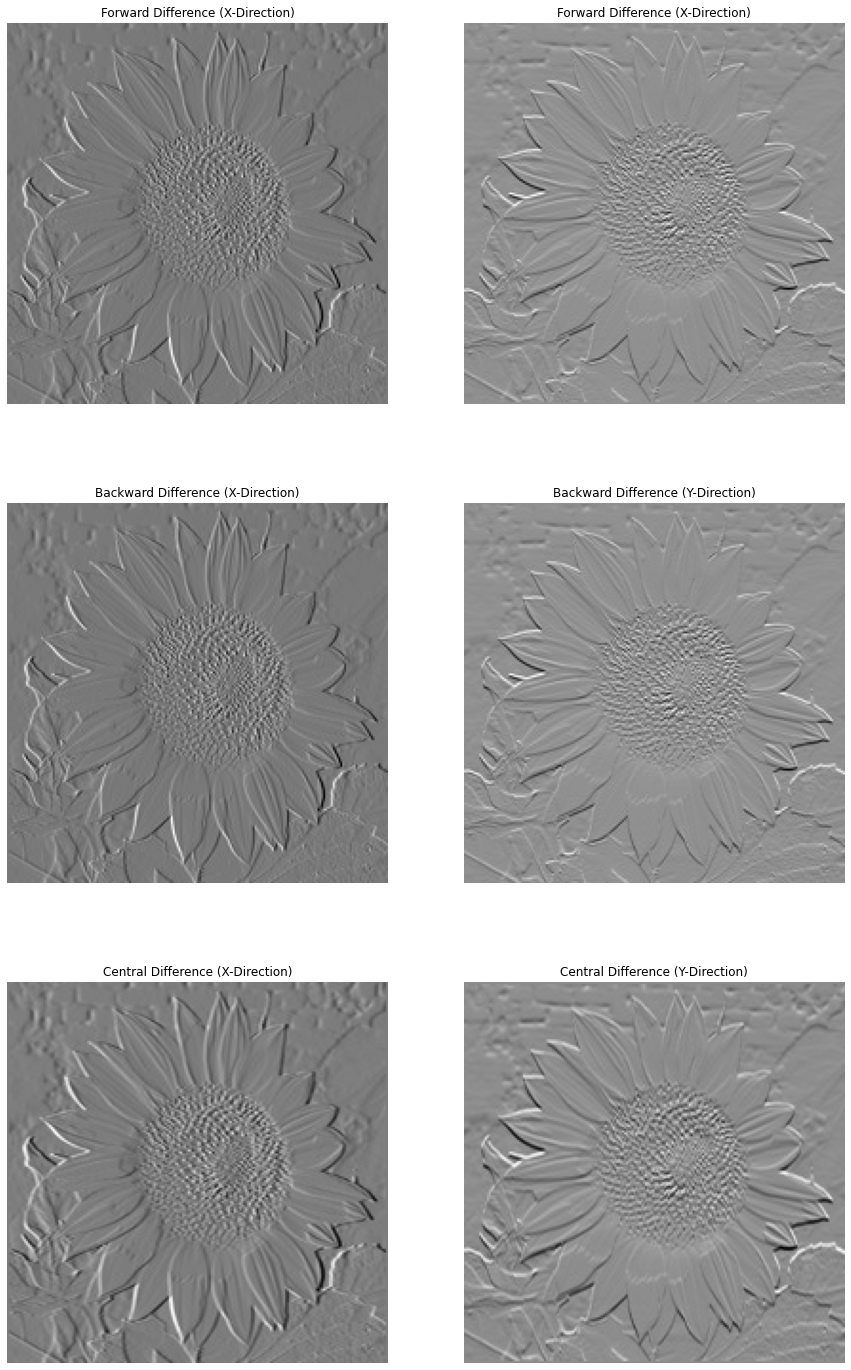

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load an image using OpenCV
def load_image(path):
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    return image.astype(np.float32)  # Convert to float for calculation

# Forward difference method
def forward_difference(image):
    gradient_x = np.zeros_like(image)
    gradient_x[:, :-1] = image[:, 1:] - image[:, :-1]
    gradient_y = np.zeros_like(image)
    gradient_y[:-1, :] = image[1:, :] - image[:-1, :]
    return gradient_x, gradient_y

# Backward difference method
def backward_difference(image):
    gradient_x = np.zeros_like(image)
    gradient_x[:, 1:] = image[:, 1:] - image[:, :-1]
    gradient_y = np.zeros_like(image)
    gradient_y[1:, :] = image[1:, :] - image[:-1, :]
    return gradient_x, gradient_y

# Central difference method
def central_difference(image):
    gradient_x = np.zeros_like(image)
    gradient_x[:, 1:-1] = (image[:, 2:] - image[:, :-2]) / 2
    gradient_y = np.zeros_like(image)
    gradient_y[1:-1, :] = (image[2:, :] - image[:-2, :]) / 2
    return gradient_x, gradient_y



# Main code
if __name__ == "__main__":
    # Load an image (replace 'path_to_image.jpg' with your image path)
    image = load_image("D:/SLTC/Teaching/School of Computing/Artificial Intelligence and Computer Vission/sample_images/3.jpg")

    # Calculate gradients
    grad_x_forward, grad_y_forward = forward_difference(image)
    grad_x_backward, grad_y_backward = backward_difference(image)
    grad_x_central, grad_y_central = central_difference(image)

    plt.figure(figsize=(15, 25))

    # Display the original image
    plt.subplot(3, 2, 1)
    plt.imshow(grad_x_forward, cmap='gray')
    plt.title('Forward Difference (X-Direction)')
    plt.axis('off')

    # Display the x derivative
    plt.subplot(3, 2, 2)
    plt.imshow(grad_y_forward, cmap='gray')
    plt.title('Forward Difference (X-Direction)')
    plt.axis('off')

    # Display the y derivative
    plt.subplot(3, 2, 3)
    plt.imshow(grad_x_backward, cmap='gray')
    plt.title('Backward Difference (X-Direction)')
    plt.axis('off')
    
    # Display the y derivative
    plt.subplot(3, 2, 4)
    plt.imshow(grad_y_backward, cmap='gray')
    plt.title('Backward Difference (Y-Direction)')
    plt.axis('off')
    
    # Display the y derivative
    plt.subplot(3, 2, 5)
    plt.imshow(grad_x_central, cmap='gray')
    plt.title('Central Difference (X-Direction)')
    plt.axis('off')
    
    # Display the y derivative
    plt.subplot(3, 2, 6)
    plt.imshow(grad_y_central, cmap='gray')
    plt.title('Central Difference (Y-Direction)')
    plt.axis('off')

    plt.show()



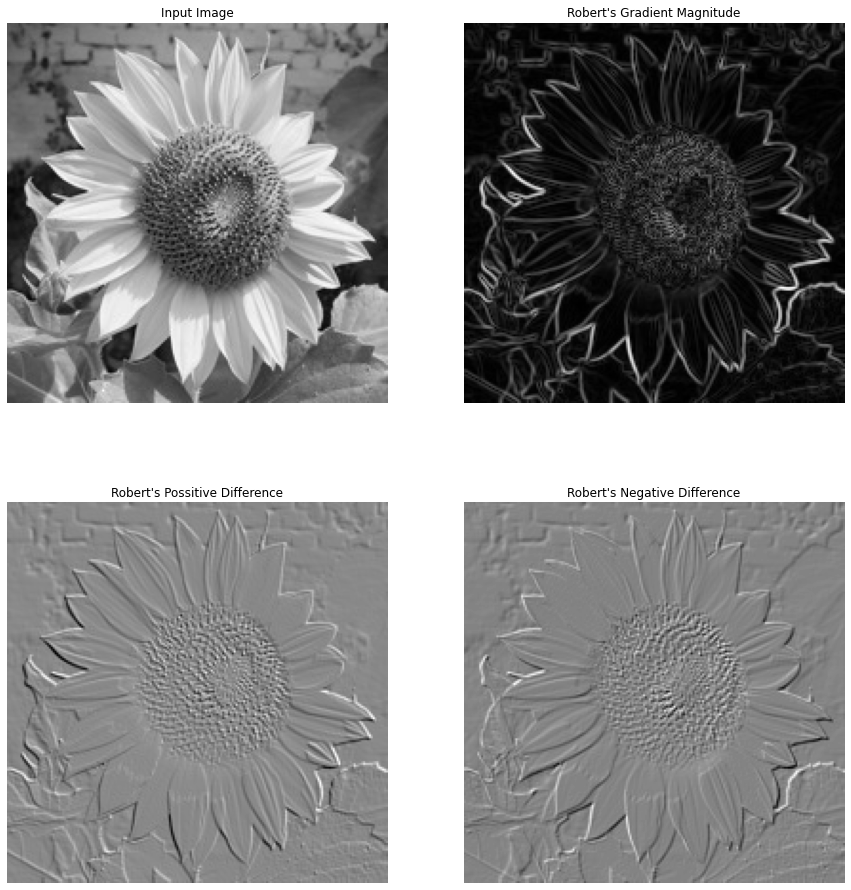

In [20]:
import numpy as np
from scipy.ndimage import convolve

def roberts_gradient(image):
    """
    Apply Robert's gradient operator to an image.

    :param image: Input 2D image as a NumPy array
    :return: Gradient magnitude image as a NumPy array
    """
    # Robert's cross operators
    roberts_cross_x = np.array([[1, 0],
                                [0, -1]])
    roberts_cross_y = np.array([[0, 1],
                                [-1, 0]])

    # Convolve the image with the Robert's cross operators
    gradient_negative = convolve(image, roberts_cross_x)
    gradient_positive = convolve(image, roberts_cross_y)

    # Compute the gradient magnitude
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    return gradient_positive, gradient_negative, gradient_magnitude


# Main code
if __name__ == "__main__":
    # Load an image (replace 'path_to_image.jpg' with your image path)
    image = load_image("D:/SLTC/Teaching/School of Computing/Artificial Intelligence and Computer Vission/sample_images/3.jpg")

    # Calculate gradients
    gradient_positive, gradient_negative, gradient_magnitude = roberts_gradient(image)

    plt.figure(figsize=(15, 25))

    # Display the original image
    plt.subplot(3, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Input Image')
    plt.axis('off')

    # Display the x derivative
    plt.subplot(3, 2, 2)
    plt.imshow(gradient_magnitude, cmap='gray')
    plt.title("Robert's Gradient Magnitude")
    plt.axis('off')

    # Display the y derivative
    plt.subplot(3, 2, 3)
    plt.imshow(gradient_positive, cmap='gray')
    plt.title("Robert's Possitive Difference")
    plt.axis('off')
    
    # Display the y derivative
    plt.subplot(3, 2, 4)
    plt.imshow(gradient_negative, cmap='gray')
    plt.title("Robert's Negative Difference")
    plt.axis('off')
    plt.show()


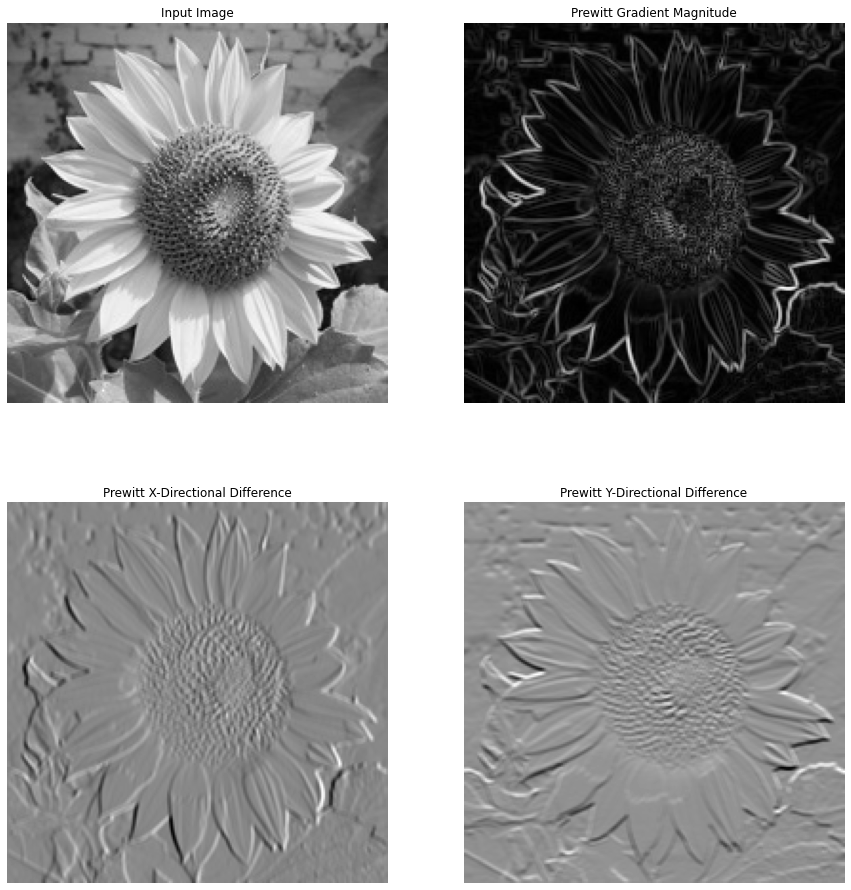

In [21]:
import numpy as np
from scipy.ndimage import convolve

def prewitt_operator(image):
    """
    Apply Prewitt operator to an image for edge detection.

    :param image: Input 2D image as a NumPy array
    :return: Gradient magnitude image as a NumPy array
    """
    # Prewitt operators
    prewitt_x = np.array([[-1, 0, 1],
                          [-1, 0, 1],
                          [-1, 0, 1]])
    prewitt_y = np.array([[1, 1, 1],
                          [0, 0, 0],
                          [-1, -1, -1]])

    # Convolve the image with the Prewitt operators
    gradient_x = convolve(image, prewitt_x)
    gradient_y = convolve(image, prewitt_y)

    # Compute the gradient magnitude
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    return gradient_x, gradient_y, gradient_magnitude


# Main code
if __name__ == "__main__":
    # Load an image (replace 'path_to_image.jpg' with your image path)
    image = load_image("D:/SLTC/Teaching/School of Computing/Artificial Intelligence and Computer Vission/sample_images/3.jpg")

    # Calculate gradients
    gradient_x, gradient_y, gradient_magnitude = prewitt_operator(image)

    plt.figure(figsize=(15, 25))

    # Display the original image
    plt.subplot(3, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Input Image')
    plt.axis('off')

    # Display the x derivative
    plt.subplot(3, 2, 2)
    plt.imshow(gradient_magnitude, cmap='gray')
    plt.title("Prewitt Gradient Magnitude")
    plt.axis('off')

    # Display the y derivative
    plt.subplot(3, 2, 3)
    plt.imshow(gradient_x, cmap='gray')
    plt.title("Prewitt X-Directional Difference")
    plt.axis('off')
    
    # Display the y derivative
    plt.subplot(3, 2, 4)
    plt.imshow(gradient_y, cmap='gray')
    plt.title("Prewitt Y-Directional Difference")
    plt.axis('off')
    plt.show()


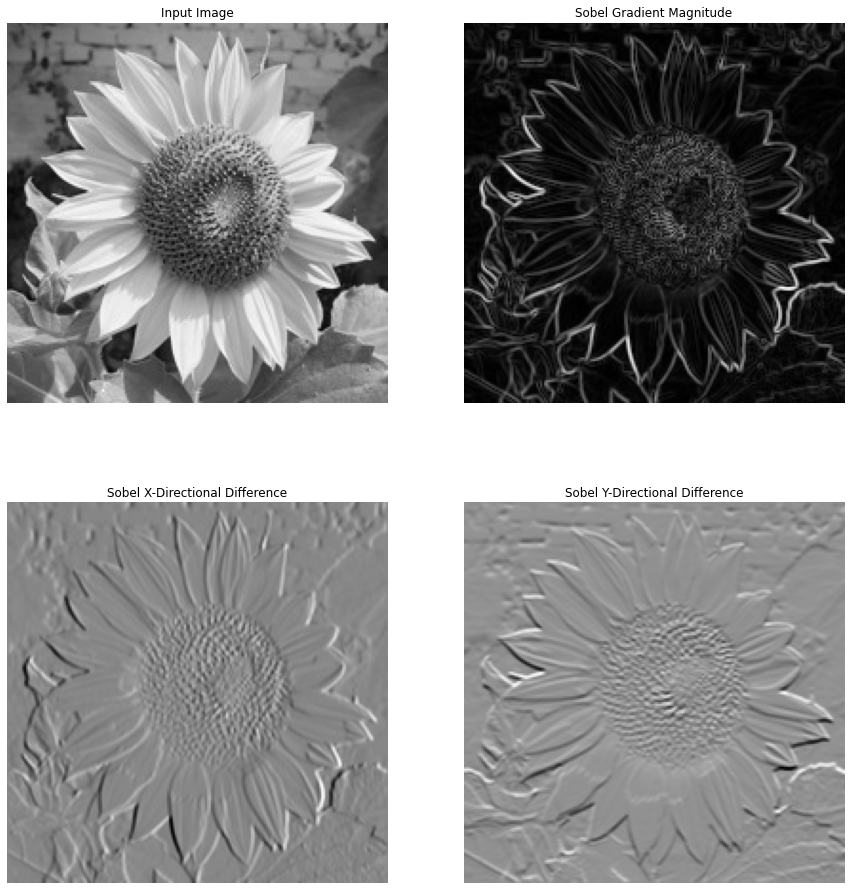

In [22]:
import numpy as np
from scipy.ndimage import convolve

def sobel_operator(image):
    """
    Apply Sobel operator to an image for edge detection.

    :param image: Input 2D image as a NumPy array
    :return: Gradient magnitude image as a NumPy array
    """
    # Sobel operators
    sobel_x = np.array([[-1, 0, 1],
                          [-2, 0, 2],
                          [-1, 0, 1]])
    sobel_y = np.array([[1, 2, 1],
                          [0, 0, 0],
                          [-1, -2, -1]])

    # Convolve the image with the Sobel operators
    gradient_x = convolve(image, sobel_x)
    gradient_y = convolve(image, sobel_y)

    # Compute the gradient magnitude
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    return gradient_x, gradient_y, gradient_magnitude


# Main code
if __name__ == "__main__":
    # Load an image (replace 'path_to_image.jpg' with your image path)
    image = load_image("D:/SLTC/Teaching/School of Computing/Artificial Intelligence and Computer Vission/sample_images/3.jpg")

    # Calculate gradients
    gradient_x, gradient_y, gradient_magnitude = sobel_operator(image)

    plt.figure(figsize=(15, 25))

    # Display the original image
    plt.subplot(3, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Input Image')
    plt.axis('off')

    # Display the x derivative
    plt.subplot(3, 2, 2)
    plt.imshow(gradient_magnitude, cmap='gray')
    plt.title("Sobel Gradient Magnitude")
    plt.axis('off')

    # Display the y derivative
    plt.subplot(3, 2, 3)
    plt.imshow(gradient_x, cmap='gray')
    plt.title("Sobel X-Directional Difference")
    plt.axis('off')
    
    # Display the y derivative
    plt.subplot(3, 2, 4)
    plt.imshow(gradient_y, cmap='gray')
    plt.title("Sobel Y-Directional Difference")
    plt.axis('off')
    plt.show()

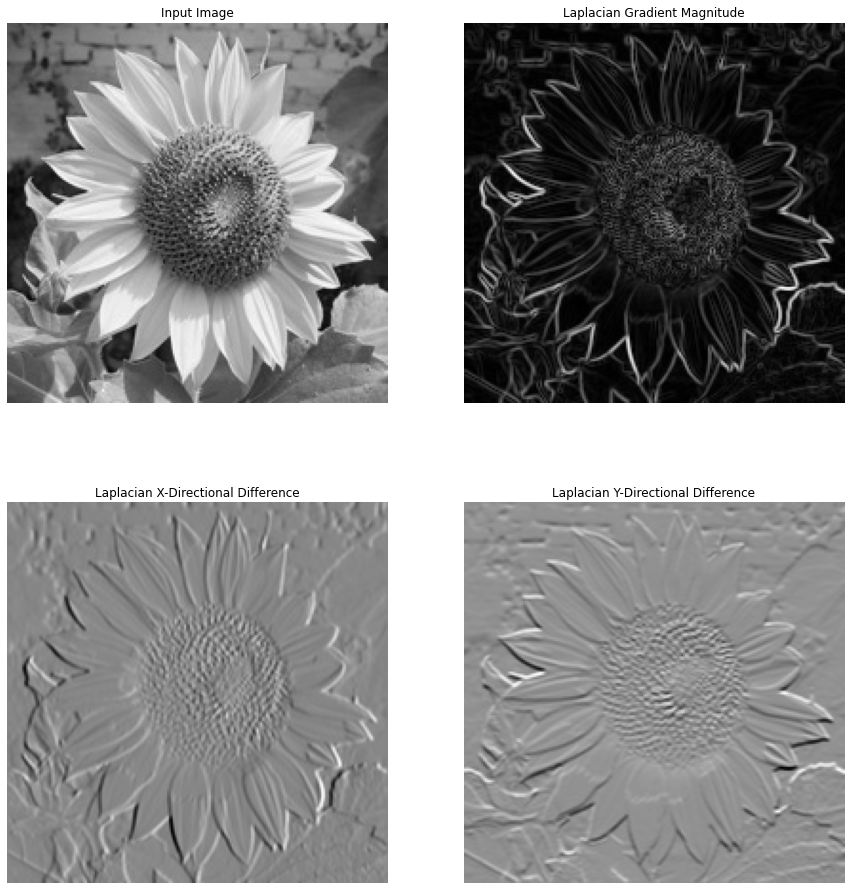

In [23]:
import numpy as np
from scipy.ndimage import convolve

def laplacian_operator(image):
    """
    Apply Sobel operator to an image for edge detection.

    :param image: Input 2D image as a NumPy array
    :return: Gradient magnitude image as a NumPy array
    """
    # Sobel operators
    laplacian_x = np.array([[0, 0, 0],
                            [1,-2, 1],
                            [0, 0, 0]])
    laplacian_y = np.array([[0, 1, 0],
                            [0,-2, 0],
                            [0, 1, 0]])

    # Convolve the image with the Sobel operators
    gradient_x = convolve(image, laplacian_x)
    gradient_y = convolve(image, laplacian_y)

    # Compute the gradient magnitude
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    return gradient_x, gradient_y, gradient_magnitude


# Main code
if __name__ == "__main__":
    # Load an image (replace 'path_to_image.jpg' with your image path)
    image = load_image("D:/SLTC/Teaching/School of Computing/Artificial Intelligence and Computer Vission/sample_images/3.jpg")
    # image = Image.open(image_path).convert('L')
    
    # Calculate gradients
    gradient_x, gradient_y, gradient_magnitude = sobel_operator(image)

    plt.figure(figsize=(15, 25))

    # Display the original image
    plt.subplot(3, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Input Image')
    plt.axis('off')

    # Display the x derivative
    plt.subplot(3, 2, 2)
    plt.imshow(gradient_magnitude, cmap='gray')
    plt.title("Laplacian Gradient Magnitude")
    plt.axis('off')

    # Display the y derivative
    plt.subplot(3, 2, 3)
    plt.imshow(gradient_x, cmap='gray')
    plt.title("Laplacian X-Directional Difference")
    plt.axis('off')
    
    # Display the y derivative
    plt.subplot(3, 2, 4)
    plt.imshow(gradient_y, cmap='gray')
    plt.title("Laplacian Y-Directional Difference")
    plt.axis('off')
    plt.show()

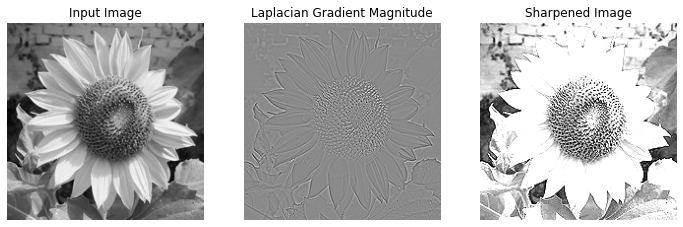

In [25]:
import numpy as np
from scipy.ndimage import convolve
import matplotlib.pyplot as plt
from PIL import Image

def load_image(path):
    # Assuming you're using PIL to load the image
    return np.array(Image.open(path).convert('L'), dtype='float')

def laplacian_operator(image, weight=1):
    """
    Apply Laplacian operator to an image for edge detection.

    :param image: Input 2D image as a NumPy array
    :return: Gradient image and sharpened image as NumPy arrays
    """
    # Laplacian operator
    laplacian = np.array([[0, 1, 0],
                          [1,-4, 1],
                          [0, 1, 0]])

    # Convolve the image with the Laplacian operator
    gradient = convolve(image, laplacian)
    mask = image - gradient
    
     # Step 3: Add the mask to the original image with the specified weight
    sharpened_image = image + weight * mask
    sharpened = np.clip(sharpened_image, 0, 255)  # Ensuring pixel values are valid

    return gradient, sharpened

# Main code
if __name__ == "__main__":
    # Load an image (replace 'path_to_image.jpg' with your image path)
    image = load_image("D:/SLTC/Teaching/School of Computing/Artificial Intelligence and Computer Vission/sample_images/3.jpg")  # Replace with the correct path
    
    # Calculate gradients
    gradient, sharpened = laplacian_operator(image)

    plt.figure(figsize=(12, 6))

    # Display the input image
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Input Image')
    plt.axis('off')

    # Display the Laplacian gradient magnitude
    plt.subplot(1, 3, 2)
    plt.imshow(gradient, cmap='gray')
    plt.title("Laplacian Gradient Magnitude")
    plt.axis('off')

    # Display the sharpened image
    plt.subplot(1, 3, 3)
    plt.imshow(sharpened, cmap='gray')
    plt.title("Sharpened Image")
    plt.axis('off')

    plt.show()


#### Unsharp Masking (USM) Steps:
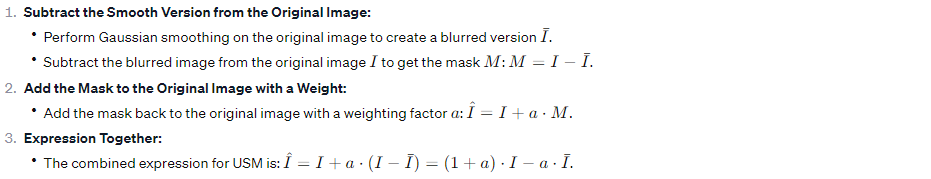

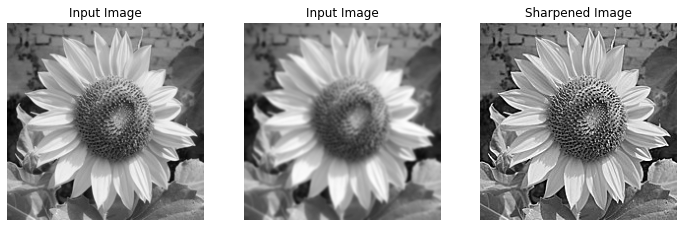

In [26]:
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

def load_image(path):
    # Assuming you're using PIL to load the image
    return np.array(Image.open(path).convert('L'), dtype='float')

def unsharp_masking(image, sigma=1, weight=1.5):
    """
    Apply Unsharp Masking to enhance edges in an image.

    :param image: Input 2D image as a NumPy array.
    :param sigma: The standard deviation of the Gaussian blur (controls the smoothness).
    :param weight: The weight of the mask to be added to the original image.
    :return: Sharpened image as a NumPy array.
    """
    # Step 1: Create the smooth (blurred) version of the image
    blurred_image = gaussian_filter(image, sigma=sigma)
    
    # Step 2: Subtract the blurred image from the original to get the mask
    mask = image - blurred_image
    
    # Step 3: Add the mask to the original image with the specified weight
    sharpened_image = image + weight * mask
    sharpened_image = np.clip(sharpened_image, 0, 255)  # Ensuring pixel values are valid
    
    return sharpened_image, blurred_image

# Main code
if __name__ == "__main__":
    # Load an image (replace 'path_to_image.jpg' with your image path)
    image = load_image("D:/SLTC/Teaching/School of Computing/Artificial Intelligence and Computer Vission/sample_images/3.jpg")  # Replace with the correct path
    
    # Calculate gradients
    sharpened, blurred_image = unsharp_masking(image)

    plt.figure(figsize=(12, 6))

    # Display the input image
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Input Image')
    plt.axis('off')
    
    # Display the gaussian blurred image
    plt.subplot(1, 3, 2)
    plt.imshow(blurred_image, cmap='gray')
    plt.title('Input Image')
    plt.axis('off')

    # Display the sharpened image
    plt.subplot(1, 3, 3)
    plt.imshow(sharpened, cmap='gray')
    plt.title("Sharpened Image")
    plt.axis('off')

    plt.show()